In [1]:
from scipy.stats import binom
from scipy.stats.distributions import chi2
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.descriptivestats import sign_test

In [36]:
results = ["L"]*475 + ["R"]*515

n = len(results)
p = results.count("L") / len(results)

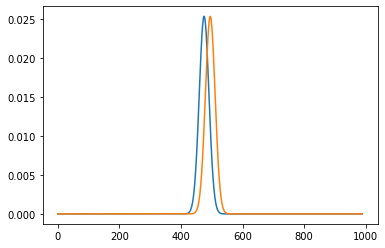

In [37]:
x = np.arange(0,n,1)
y = lambda x: [binom.pmf(i, n, p) for i in x]
plt.plot(x, y(x))

y_d = lambda x: [binom.pmf(i, n, 0.5) for i in x]
plt.plot(x, y_d(x))

plt.show()

# z-test

Approximiert die Binomialverteilung mit einer Normalverteilung => nur gut bei großen Samples

https://stats.stackexchange.com/a/210554/265388

In [38]:
p_circumflex = lambda n_1, n_2, p_1, p_2 : (n_1*p_1 + n_2*p_2) / (n_1 + n_2)
z_test = lambda n_1, n_2, p_1, p_2:\
            (lambda n_1, n_2, p_1, p_2, p_c : (p_1 - p_2) / np.sqrt(p_c*(1-p_c)*(1/n_1 + 1/n_2)))\
        (n_1, n_2, p_1, p_2, p_circumflex(n_1, n_2, p_1, p_2))

z_score = z_test(n, n, p, 0.5)/2
p_value = scipy.stats.norm.sf(abs(z_score))
print("z-score:", z_score)
print("p-value:", p_value)

z-score: -0.4495583215726898
p-value: 0.3265144730901698


# Fisher's test

Besser

In [39]:
contingency_table = [[results.count("L"), n - results.count("L")],
                [0.5 * n, 0.5 * n]
               ]
fisher_results = scipy.stats.fisher_exact(contingency_table, alternative="two-sided")

print("odds-ratio:", fisher_results[0])
print("p-value:", fisher_results[1])

odds-ratio: 0.9223300970873787
p-value: 0.3930213625596538


# McNemar's test

In [40]:
chi_square = (contingency_table[0][1] - contingency_table[1][0])**2 / (contingency_table[0][1] + contingency_table[1][0])
chi_square = ((contingency_table[0][0] - contingency_table[1][0])**2 / contingency_table[1][0] +\
              (contingency_table[0][1] - contingency_table[1][1])**2 / contingency_table[1][1]) / 2
chi_square = (contingency_table[0][1] - contingency_table[1][1])**2 / contingency_table[1][1]
p_value = chi2.sf(chi_square, 1)

print("Chi-square:", chi_square)
print("p-value:", p_value)

Chi-square: 0.8080808080808081
p-value: 0.3686882693617817


# Sign test
# Wilcoxon test

In [41]:

new_results = [-1 if c == "L" else 1 for c in results]
print("sign test:", sign_test(new_results))
print("wilcoxon:", scipy.stats.wilcoxon(new_results))

sign test: (20.0, 0.2151392089791738)
wilcoxon: WilcoxonResult(statistic=235362.5, pvalue=0.2036278270936056)
